<a href="https://colab.research.google.com/github/agggaurav/Titanic-Ml-from-disaster/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.svm import LinearSVR
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Dropout


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
train_url = 'https://raw.githubusercontent.com/agggaurav/Titanic-Ml-from-disaster/master/train.csv'
train_data = pd.read_csv(train_url)

In [12]:
train_url = 'https://raw.githubusercontent.com/agggaurav/Titanic-Ml-from-disaster/master/train.csv'


In [13]:
train_data = pd.read_csv(train_url)

In [14]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

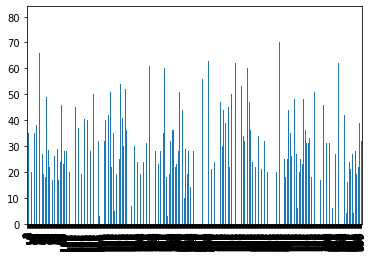

In [10]:
train_data['Age'].plot.bar()

In [15]:
train_data['Age_Set'] = round(train_data['Age']/10)

In [16]:
train_data['Age_Set']

0      2.0
1      4.0
2      3.0
3      4.0
4      4.0
      ... 
886    3.0
887    2.0
888    NaN
889    3.0
890    3.0
Name: Age_Set, Length: 891, dtype: float64

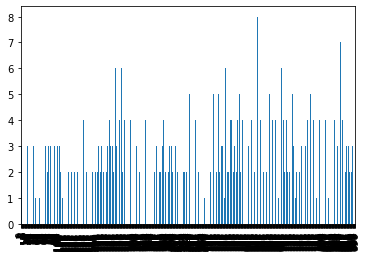

In [17]:
train_data['Age_Set'].plot.bar()

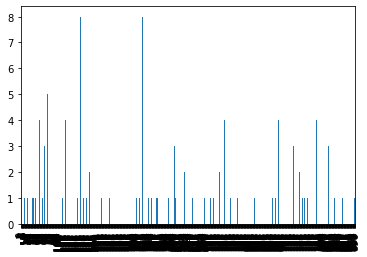

In [16]:
train_data['SibSp'].plot.bar()

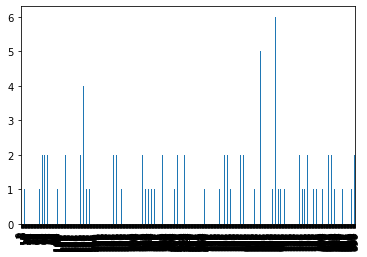

In [18]:
train_data['Parch'].plot.bar()

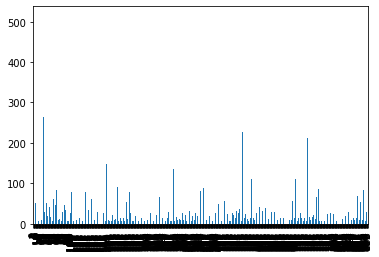

In [20]:
train_data['Fare'].plot.bar()

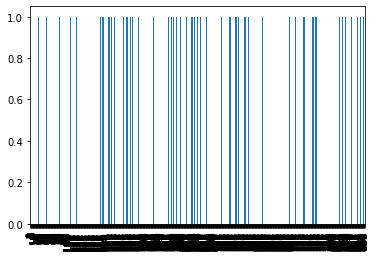

In [21]:
train_data['Survived'].plot.bar()

In [18]:
train_data['male']=train_data[train_data['Sex']=='male']['Sex']

In [19]:
train_data['male'].fillna(0,inplace=True)

In [20]:
train_data['male'].replace('male',1,inplace=True)

In [21]:
train_data['male']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: male, Length: 891, dtype: int64

In [22]:
train_data['female']=train_data[train_data['Sex']=='female']['Sex']

In [23]:
train_data['female'].fillna(0,inplace=True)

In [24]:
train_data['female'].replace('female',1,inplace=True)

In [25]:
train_data[['male','female']]

,male,female
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
886,1,0
887,0,1
888,0,1
889,1,0


In [26]:
train_data['Embarked_S'] = train_data[train_data['Embarked']=='S']['Embarked']

In [27]:
train_data['Embarked_S'].fillna(0,inplace = True)

In [28]:
train_data['Embarked_S'].replace('S',1,inplace = True)

In [29]:
train_data['Embarked_S']

0      1
1      0
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    0
890    0
Name: Embarked_S, Length: 891, dtype: int64

In [30]:
train_data['Embarked_C'] = train_data[train_data['Embarked']=='C']['Embarked']
train_data['Embarked_C'].fillna(0,inplace = True)
train_data['Embarked_C'].replace('C',1,inplace = True)

In [31]:
train_data['Embarked_C']

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    0
Name: Embarked_C, Length: 891, dtype: int64

In [32]:
train_data['Embarked_Q'] = train_data[train_data['Embarked']=='Q']['Embarked']
train_data['Embarked_Q'].fillna(0,inplace = True)
train_data['Embarked_Q'].replace('Q',1,inplace = True)

In [33]:
train_data['Embarked_Q']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    1
Name: Embarked_Q, Length: 891, dtype: int64

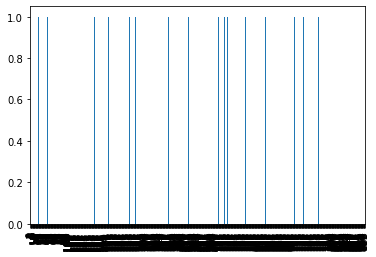

In [34]:
train_data['Embarked_Q'].plot.bar()

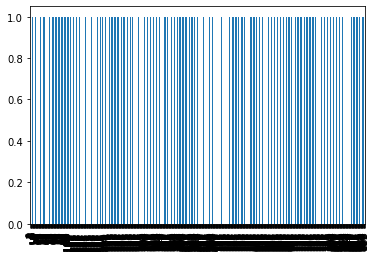

In [35]:
train_data['Embarked_S'].plot.bar()

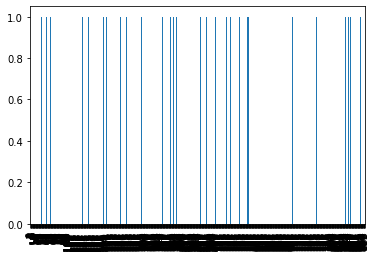

In [36]:
train_data['Embarked_C'].plot.bar()

In [37]:
train_data[['Pclass_1','Pclass_2','Pclass_3']] = pd.get_dummies(train_data['Pclass'], prefix='Pclass')

In [38]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Set,male,female,Embarked_S,Embarked_C,Embarked_Q,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0,1,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.0,0,1,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.0,0,1,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4.0,0,1,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4.0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3.0,1,0,1,0,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2.0,0,1,1,0,0,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,0,1,1,0,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3.0,1,0,0,1,0,1,0,0


In [39]:
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    print(big_string)
    return np.nan

In [40]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']
train_data['Title']=train_data['Name'].map(lambda x: substrings_in_string(x, title_list))

In [69]:
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Mlle', 'Col', 'Capt', 'Countess', 'Jonkheer'],
      dtype=object)

In [41]:
train_data[['Title_Mr', 'Title_Mrs', 'Title_Miss', 'Title_Master', 'Title_Don', 'Title_Rev', 'Title_Dr', 'Title_Mme', 'Title_Ms',
       'Title_Major', 'Title_Mlle', 'Title_Col', 'Title_Capt', 'Title_Countess', 'Title_Jonkheer']] = pd.get_dummies(train_data['Title'], prefix='Title')

In [42]:
train_data[['Title_Mr', 'Title_Mrs', 'Title_Miss', 'Title_Master', 'Title_Don', 'Title_Rev', 'Title_Dr', 'Title_Mme', 'Title_Ms',
       'Title_Major', 'Title_Mlle', 'Title_Col', 'Title_Capt', 'Title_Countess', 'Title_Jonkheer']]

,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_Don,Title_Rev,Title_Dr,Title_Mme,Title_Ms,Title_Major,Title_Mlle,Title_Col,Title_Capt,Title_Countess,Title_Jonkheer
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
887,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [43]:
ticket_split = train_data['Ticket'].str.split(' ')

In [133]:
ticket_split[0][-1]

'21171'

In [44]:
def ticket_number(ticket_split):
	for i in range(len(ticket_split)):
		yield ticket_split[i][-1]

In [45]:
ticket_num = ticket_number(ticket_split)
tick = list(ticket_num)

In [46]:
tick

['21171',
 '17599',
 '3101282',
 '113803',
 '373450',
 '330877',
 '17463',
 '349909',
 '347742',
 '237736',
 '9549',
 '113783',
 '2151',
 '347082',
 '350406',
 '248706',
 '382652',
 '244373',
 '345763',
 '2649',
 '239865',
 '248698',
 '330923',
 '113788',
 '349909',
 '347077',
 '2631',
 '19950',
 '330959',
 '349216',
 '17601',
 '17569',
 '335677',
 '24579',
 '17604',
 '113789',
 '2677',
 '2152',
 '345764',
 '2651',
 '7546',
 '11668',
 '349253',
 '2123',
 '330958',
 '23567',
 '370371',
 '14311',
 '2662',
 '349237',
 '3101295',
 '39886',
 '17572',
 '2926',
 '113509',
 '19947',
 '31026',
 '2697',
 '34651',
 '2144',
 '2669',
 '113572',
 '36973',
 '347088',
 '17605',
 '2661',
 '29395',
 '3464',
 '3101281',
 '315151',
 '33111',
 '2144',
 '14879',
 '2680',
 '1601',
 '348123',
 '349208',
 '374746',
 '248738',
 '364516',
 '345767',
 '345779',
 '330932',
 '113059',
 '14885',
 '3101278',
 '6608',
 '392086',
 '19950',
 '343275',
 '343276',
 '347466',
 '5734',
 '2315',
 '364500',
 '374910',
 '17754

In [47]:
train_data['Ticket_Number'] = tick

In [48]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Set,male,female,Embarked_S,Embarked_C,Embarked_Q,Pclass_1,Pclass_2,Pclass_3,Title,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_Don,Title_Rev,Title_Dr,Title_Mme,Title_Ms,Title_Major,Title_Mlle,Title_Col,Title_Capt,Title_Countess,Title_Jonkheer,Ticket_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0,1,0,1,0,0,0,0,1,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.0,0,1,0,1,0,1,0,0,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.0,0,1,1,0,0,0,0,1,Miss,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4.0,0,1,1,0,0,1,0,0,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4.0,1,0,1,0,0,0,0,1,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3.0,1,0,1,0,0,0,1,0,Rev,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,211536
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2.0,0,1,1,0,0,1,0,0,Miss,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,112053
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,0,1,1,0,0,0,0,1,Miss,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6607
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3.0,1,0,0,1,0,1,0,0,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,111369


In [49]:
import numpy as np
from numpy import isnan
from sklearn.impute import KNNImputer


In [50]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Set', 'male',
       'female', 'Embarked_S', 'Embarked_C', 'Embarked_Q', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Title', 'Title_Mr', 'Title_Mrs', 'Title_Miss',
       'Title_Master', 'Title_Don', 'Title_Rev', 'Title_Dr', 'Title_Mme',
       'Title_Ms', 'Title_Major', 'Title_Mlle', 'Title_Col', 'Title_Capt',
       'Title_Countess', 'Title_Jonkheer', 'Ticket_Number'],
      dtype='object')

In [51]:
imputer = KNNImputer()

In [52]:
X = train_data[['Age', 'SibSp','Parch','Fare','Age_Set', 'male',
       'female', 'Embarked_S', 'Embarked_C', 'Embarked_Q', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Title_Mr', 'Title_Mrs', 'Title_Miss',
       'Title_Master', 'Title_Don', 'Title_Rev', 'Title_Dr', 'Title_Mme',
       'Title_Ms', 'Title_Major', 'Title_Mlle', 'Title_Col', 'Title_Capt',
       'Title_Countess', 'Title_Jonkheer']]

In [53]:
y = train_data['Survived']


In [54]:
imputer.fit(X)


KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=5, weights='uniform')

In [55]:
Xtrans = imputer.transform(X)

In [56]:
train_data['Age_Imputed'] = Xtrans[:,0]

In [57]:
train_data['Age_Imputed']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    13.2
889    26.0
890    32.0
Name: Age_Imputed, Length: 891, dtype: float64

In [58]:
train_data['Age_Set_Imputed'] = round(train_data['Age_Imputed']/10)

In [59]:
train_data['Age_Set_Imputed']

0      2.0
1      4.0
2      3.0
3      4.0
4      4.0
      ... 
886    3.0
887    2.0
888    1.0
889    3.0
890    3.0
Name: Age_Set_Imputed, Length: 891, dtype: float64

In [74]:
train_data = train_data[train_data['Ticket_Number']!='LINE']

In [93]:
model = Sequential()
model.add(Dense(64, input_dim=29, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [94]:
model.fit(train_data[['Age_Imputed','Age_Set_Imputed', 'SibSp','Parch', 'Fare', 'male','female', 'Embarked_S', 'Embarked_C', 'Embarked_Q', 'Pclass_1','Pclass_2', 'Pclass_3', 'Title_Mr', 'Title_Mrs', 'Title_Miss','Title_Master', 'Title_Don', 'Title_Rev', 'Title_Dr', 'Title_Mme','Title_Ms', 'Title_Major', 'Title_Mlle', 'Title_Col', 'Title_Capt','Title_Countess', 'Title_Jonkheer', 'Ticket_Number']], train_data['Survived'], epochs=100, verbose=1)

Epoch 1/100
887/887 [==============================] - 0s 123us/step - loss: 1381.0671 - accuracy: 0.5457
Epoch 2/100
887/887 [==============================] - 0s 38us/step - loss: 536.0118 - accuracy: 0.5660
Epoch 3/100
887/887 [==============================] - 0s 39us/step - loss: 531.5755 - accuracy: 0.5637
Epoch 4/100
887/887 [==============================] - 0s 40us/step - loss: 748.9775 - accuracy: 0.5536
Epoch 5/100
887/887 [==============================] - 0s 39us/step - loss: 384.0539 - accuracy: 0.5637
Epoch 6/100
887/887 [==============================] - 0s 44us/step - loss: 344.6456 - accuracy: 0.5637
Epoch 7/100
887/887 [==============================] - 0s 41us/step - loss: 301.2390 - accuracy: 0.5400
Epoch 8/100
887/887 [==============================] - 0s 46us/step - loss: 479.0516 - accuracy: 0.5411
Epoch 9/100
887/887 [==============================] - 0s 46us/step - loss: 261.8738 - accuracy: 0.5209
Epoch 10/100
887/887 [==============================] - 0s 49u

In [98]:
model.predict_classes(train_data[['Age_Imputed','Age_Set_Imputed', 'SibSp','Parch', 'Fare', 'male','female', 'Embarked_S', 'Embarked_C', 'Embarked_Q', 'Pclass_1','Pclass_2', 'Pclass_3', 'Title_Mr', 'Title_Mrs', 'Title_Miss','Title_Master', 'Title_Don', 'Title_Rev', 'Title_Dr', 'Title_Mme','Title_Ms', 'Title_Major', 'Title_Mlle', 'Title_Col', 'Title_Capt','Title_Countess', 'Title_Jonkheer', 'Ticket_Number']])

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 887, dtype: int64